In [44]:
import numpy as np
import os 
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import sys
sys.path.append('../')
import src.learning as lrn
%load_ext autoreload
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
data_random = np.load("../saved/controllable_set/reachset_train/20231115-025054/data_random.npy")
data_structured = np.load("../saved/controllable_set/reachset_train/20231115-025054/data_structured.npy")

In [46]:
# print shapes
print(f"Random data shape: {data_random.shape}")
print(f"Structured data shape: {data_structured.shape}")

Random data shape: (68140, 11)
Structured data shape: (20585, 11)


In [47]:
feasibility_random = np.hstack((data_random[:, :5], np.zeros((data_random.shape[0], 1))))
feasibility_structured = np.hstack((data_structured[:, :5], np.zeros((data_structured.shape[0], 1))))
feasibility_data = np.vstack((feasibility_random, feasibility_structured))

In [66]:
ctrlable_set = np.load('../saved/controllable_set/data.npy')
indices = [2, 3, 5, 6, 7]
ctrlable_set = ctrlable_set[:, indices]
ctrlable_set = ctrlable_set[ctrlable_set[:, 1] > 0.0, :]

# random sample from ctrlable set
np.random.seed(0)
#rand_idx = np.random.choice(ctrlable_set.shape[0], 1000, replace=False)
#ctrlable_set = ctrlable_set[rand_idx, :]

In [67]:
alt, vx, vz, mass, tgo = ctrlable_set[:, 0], ctrlable_set[:, 1], ctrlable_set[:, 2], ctrlable_set[:, 3], ctrlable_set[:, 4]
z = np.log(mass)
alt_, vx_, vz_, z_, tgo_ = lrn.transform_ic(alt, vx, vz, z, tgo)
ctrlable_set_ = np.vstack((alt_, vx_, vz_, z_, tgo_)).T

# create an array where vx (index 1) is flipped
ctrlable_set_negative_vx_ = ctrlable_set_.copy()
ctrlable_set_negative_vx_[:, 1] = -ctrlable_set_negative_vx_[:, 1]

# use 50% of each ctrlable_set and ctrlable_set_negative_vx; use random indices
# random binary array; 0: use ctrlable_set, 1: use ctrlable_set_negative_vx
random_binary = np.random.randint(0, 2, ctrlable_set.shape[0])
#ctrlable_set_ = ctrlable_set_[random_binary == 0, :]
#ctrlable_set_negative_vx_ = ctrlable_set_negative_vx_[random_binary == 1, :]
ctrlable_set_ = np.vstack((ctrlable_set_, ctrlable_set_negative_vx_))

hull_inner = ConvexHull(ctrlable_set_, qhull_options='Q12')

QhullError: QH6417 qhull precision error (qh_merge_twisted): twisted facet f13561 does not contain pinched vertices.  Too wide to merge into neighbor.  mindist -5.7e-11 maxdist  0 vertexdist 6.2e-09 maxpinched 6e-13 neighbor f220024 mindist -2.4e-12 maxdist  0
ERRONEOUS FACET:
- f13561
    - flags: bottom newfacet tested keepcentrum newmerge
    - merges: 445
    - normal:        -0       -0        0        0       -1
    - offset: 0.04421053
    - center: 0.005000000003993743 -0.009790841570834872 0.4919835497038178 0.3326849004196381 0.04421052631578947 
    - coplanar set(furthest p13207):
      p8:     0.005 1.087e-22   0.5037  0.06169  0.04421
      p13200:     0.005 -7.021e-09   0.5037  0.06169  0.04421
      p13207:     0.005 -1.087e-22   0.5037  0.06169  0.04421
      furthest distance=  0
    - vertices: p13265(v2164) p13330(v2090) p33(v2088) p13258(v2084) p10(v2082) p13282(v2043) p13293(v2042) p13218(v2025) p13221(v2024) p13219(v2023) p13199(v2011) p13269(v1854) p13278(v1853) p120(v1572) p13299(v1571) p4(v1466) p77(v1432) p134(v1429) p13332(v1305) p75(v1304) p86(v1303) p39(v1302) p15(v1299) p13206(v1268) p13283(v1266) p13314(v1265) p13210(v1245) p13202(v1239) p13268(v1135) p13308(v944) p89(v868) p46(v856) p17(v828) p13333(v789) p96(v788) p13(v787) p6(v779) p13203(v763) p98(v697) p13239(v693) p13271(v673) p13281(v672) p13288(v504) p13315(v456) p24(v453) p5(v446) p13205(v444) p79(v382) p13213(v372) p13290(v272) p127(v235) p7(v202) p13264(v166) p13284(v85) p0(v5) p131(v1)
    - neighboring facets: f158501 f212523 f212572 f212769 f188542 f111273 f212751 f121794 f219095 f219135 f211766 f220152 f219104 f205774 f212741 f212675 f211074 f220124 f212777 f212780 f188449 f128231 f219068 f211076 f88662 f211767 f211941 f139640 f128125 f188108 f128306 f88626 f219110 f212576 f139604 f141779 f212717 f90039 f211670 f158379 f72944 f219144 f212485 f205838 f211568 f205870 f219143 f111265 f212733 f219107 f219073 f111315 f219116 f141762 f188352 f219112 f219072 f188134 f219118 f183553 f205857 f211413 f146377 f212747 f188387 f211917 f128289 f105407 f190791 f73062 f141820 f107759 f124012 f188421 f139627 f188105 f211078 f211061 f105403 f158477 f219093 f158404 f212714 f211912 f212307 f158480 f158502 f212759 f212611 f111271 f111272 f123921 f211635 f188149 f212766 f190908 f219137 f134776 f211066 f158306 f190956 f220127 f219154 f212795 f219113 f211097 f188390 f141763 f188150 f141793 f188193 f146362 f211412 f188440 f211705 f158422 f139625 f188423 f188353 f220026 f141592 f183649 f219138 f158401 f212764 f158538 f158388 f188131 f211099 f158294 f188097 f211592 f211493 f158478 f111268 f212730 f188486 f211942 f211458 f211631 f211492 f211487 f205833 f212301 f212736 f211875 f211542 f211741 f212770 f212742 f212775 f205792 f205980 f212803 f206000 f158302 f212762 f219153 f219141 f219145 f219114 f219142 f219115 f211490 f211489 f211520 f211642 f211737 f211633 f211617 f211541 f211632 f127952 f211876 f211899 f212737 f212317 f212300 f212323 f212308 f212551 f212719 f212718 f212767 f212784 f212782 f212796 f212811 f212810 f212809 f219071 f219086 f219139 f219088 f219111 f219140 f219092 f219993 f219994 f219991 f220153 f220125 f220024 f220126
    - ridges:
     - r10888 tested simplicialtop
           vertices: p120(v1572) p96(v788) p127(v235) p7(v202)
           between f158501 and f13561
     - r16648 tested simplicialbot
           vertices: p13330(v2090) p13332(v1305) p13315(v456) p127(v235)
           between f13561 and f212523
     - r16659 tested simplicialbot
           vertices: p13330(v2090) p13332(v1305) p13281(v672) p13315(v456)
           between f13561 and f212572
     - r16980 tested simplicialtop
           vertices: p13330(v2090) p13218(v2025) p13203(v763) p131(v1)
           between f212769 and f13561
     - r13330 tested simplicialtop
           vertices: p13269(v1854) p13299(v1571) p13332(v1305) p7(v202)
           between f188542 and f13561
     - r5253 tested simplicialbot
           vertices: p13268(v1135) p89(v868) p79(v382) p7(v202)
           between f13561 and f111273
     - r7287 tested
           vertices: p39(v1302) p89(v868) p79(v382) p7(v202)
           between f111273 and f13561
     - r7295 tested
           vertices: p39(v1302) p13268(v1135) p79(v382) p7(v202)
           between f13561 and f111273
     - r16371 tested
           vertices: p13258(v2084) p39(v1302) p13268(v1135) p79(v382)
           between f13561 and f111273
     - r16906 tested simplicialtop
           vertices: p13330(v2090) p13203(v763) p98(v697) p131(v1)
           between f212751 and f13561
     - r6179 tested simplicialbot
           vertices: p13210(v1245) p13202(v1239) p13203(v763) p13205(v444)
           between f13561 and f121794
     - r6429 tested
           vertices: p13206(v1268) p13210(v1245) p13213(v372) p7(v202)
           between f219095 and f13561
     - r15112 tested simplicialbot
           vertices: p13221(v2024) p13210(v1245) p13213(v372) p7(v202)
           between f13561 and f219095
     - r6355 tested simplicialbot
           vertices: p13314(v1265) p13315(v456) p7(v202) p13284(v85)
           between f13561 and f219135
     - r16274 tested simplicialbot
           vertices: p10(v2082) p4(v1466) p13202(v1239) p5(v446)
           between f13561 and f211766
     - r17749 tested simplicialbot
           vertices: p13265(v2164) p13330(v2090) p13213(v372) p13264(v166)
           between f13561 and f220152
     - r1726 tested
           vertices: p13271(v673) p13290(v272) p7(v202) p13284(v85)
           between f13561 and f219104
     - r6354 tested simplicialtop
           vertices: p13314(v1265) p13290(v272) p7(v202) p13284(v85)
           between f219104 and f13561
     - r6370 tested
           vertices: p13314(v1265) p13271(v673) p13290(v272) p13284(v85)
           between f219104 and f13561
     - r15291 tested
           vertices: p13293(v2042) p13314(v1265) p13271(v673) p13284(v85)
           between f13561 and f219104
     - r15287 tested
           vertices: p13293(v2042) p13314(v1265) p13271(v673) p13290(v272)
           between f219104 and f13561
     - r15139 tested simplicialtop
           vertices: p13221(v2024) p13283(v1266) p13281(v672) p13284(v85)
           between f205774 and f13561
     - r16965 tested simplicialtop
           vertices: p13330(v2090) p13221(v2024) p13210(v1245) p13281(v672)
           between f212741 and f13561
     - r16834 tested simplicialtop
           vertices: p13330(v2090) p13269(v1854) p13299(v1571) p13332(v1305)
           between f212675 and f13561
     - r6432 tested simplicialtop
           vertices: p13206(v1268) p17(v828) p13203(v763) p7(v202)
           between f211074 and f13561
     - r17759 tested simplicialbot
           vertices: p13265(v2164) p13203(v763) p98(v697) p13213(v372)
           between f13561 and f220124
     - r16966 tested simplicialbot
           vertices: p13330(v2090) p13221(v2024) p13210(v1245) p13213(v372)
           between f13561 and f212777
     - r16968 tested simplicialtop
           vertices: p13330(v2090) p13221(v2024) p13315(v456) p13264(v166)
           between f212780 and f13561
     - r16952 tested
           vertices: p13330(v2090) p13278(v1853) p13268(v1135) p131(v1)
           between f188449 and f13561
     - r13241 tested simplicialbot
           vertices: p13278(v1853) p13268(v1135) p79(v382) p131(v1)
           between f13561 and f188449
     - r7378 tested simplicialbot
           vertices: p75(v1304) p96(v788) p13(v787) p7(v202)
           between f13561 and f128231
     - r15147 tested simplicialtop
           vertices: p13218(v2025) p13219(v2023) p13210(v1245) p7(v202)
           between f219068 and f13561
     - r8777 tested simplicialbot
           vertices: p4(v1466) p17(v828) p13203(v763) p7(v202)
           between f13561 and f211076
     - r2734 tested simplicialbot
           vertices: p6(v779) p13203(v763) p13205(v444) p7(v202)
           between f13561 and f88662
     - r8754 tested
           vertices: p4(v1466) p6(v779) p13203(v763) p7(v202)
           between f88662 and f13561
     - r6424 tested
           vertices: p13206(v1268) p13203(v763) p13205(v444) p7(v202)
           between f88662 and f13561
     - r16279 tested simplicialtop
           vertices: p10(v2082) p4(v1466) p13202(v1239) p0(v5)
           between f211767 and f13561
     - r10834 tested simplicialbot
           vertices: p120(v1572) p13308(v944) p89(v868) p131(v1)
           between f13561 and f211941
     - r7243 tested simplicialbot
           vertices: p15(v1299) p13(v787) p24(v453) p7(v202)
           between f13561 and f139640
     - r7355 tested simplicialbot
           vertices: p86(v1303) p96(v788) p127(v235) p7(v202)
           between f13561 and f128125
     - r8620 tested simplicialtop
           vertices: p77(v1432) p46(v856) p127(v235) p131(v1)
           between f188108 and f13561
     - r7398 tested simplicialbot
           vertices: p13332(v1305) p13314(v1265) p13315(v456) p7(v202)
           between f13561 and f128306
     - r2728 tested simplicialtop
           vertices: p6(v779) p13203(v763) p13205(v444) p0(v5)
           between f88626 and f13561
     - r8722 tested
           vertices: p4(v1466) p13202(v1239) p6(v779) p0(v5)
           between f13561 and f88626
     - r6145 tested
           vertices: p13202(v1239) p6(v779) p13205(v444) p0(v5)
           between f88626 and f13561
     - r6142 tested
           vertices: p13202(v1239) p13203(v763) p13205(v444) p0(v5)
           between f13561 and f88626
     - r8741 tested
           vertices: p4(v1466) p6(v779) p13203(v763) p0(v5)
           between f13561 and f88626
     - r14776 tested
           vertices: p13199(v2011) p13202(v1239) p13203(v763) p0(v5)
           between f88626 and f13561
     - r15318 tested simplicialtop
           vertices: p13282(v2043) p13293(v2042) p13271(v673) p13290(v272)
           between f219110 and f13561
     - r16662 tested simplicialtop
           vertices: p13330(v2090) p98(v697) p13315(v456) p127(v235)
           between f212576 and f13561
     - r7360 tested simplicialtop
           vertices: p86(v1303) p46(v856) p127(v235) p7(v202)
           between f139604 and f13561
     - r8610 tested simplicialbot
           vertices: p77(v1432) p15(v1299) p46(v856) p7(v202)
           between f13561 and f141779
     - r16891 tested simplicialtop
           vertices: p13330(v2090) p13332(v1305) p13281(v672) p13290(v272)
           between f212717 and f13561
     - r4148 tested simplicialbot
           vertices: p13308(v944) p89(v868) p13288(v504) p7(v202)
           between f13561 and f90039
     - r10849 tested
           vertices: p120(v1572) p13308(v944) p89(v868) p7(v202)
           between f90039 and f13561
     - r16241 tested simplicialbot
           vertices: p10(v2082) p13218(v2025) p39(v1302) p7(v202)
           between f13561 and f211670
     - r16689 tested
           vertices: p13330(v2090) p120(v1572) p13332(v1305) p131(v1)
           between f13561 and f158379
     - r2945 tested simplicialtop
           vertices: p96(v788) p13(v787) p24(v453) p7(v202)
           between f72944 and f13561
     - r7352 tested
           vertices: p86(v1303) p96(v788) p24(v453) p7(v202)
           between f72944 and f13561
     - r15124 tested simplicialbot
           vertices: p13221(v2024) p13315(v456) p7(v202) p13264(v166)
           between f13561 and f219144
     - r16645 tested simplicialtop
           vertices: p13330(v2090) p13332(v1305) p13333(v789) p127(v235)
           between f212485 and f13561
     - r15151 tested simplicialtop
           vertices: p13218(v2025) p13210(v1245) p13202(v1239) p13205(v444)
           between f205838 and f13561
     - r16252 tested simplicialbot
           vertices: p10(v2082) p120(v1572) p39(v1302) p131(v1)
           between f13561 and f211568
     - r15217 tested simplicialbot
           vertices: p13218(v2025) p13210(v1245) p13202(v1239) p13203(v763)
           between f13561 and f205870
     - r1842 tested simplicialbot
           vertices: p13239(v693) p13271(v673) p13281(v672) p13290(v272)
           between f13561 and f219143
     - r10808 tested
           vertices: p13299(v1571) p13268(v1135) p13288(v504) p7(v202)
           between f111265 and f13561
     - r13246 tested
           vertices: p13278(v1853) p13299(v1571) p13268(v1135) p13288(v504)
           between f111265 and f13561
     - r16926 tested simplicialbot
           vertices: p13330(v2090) p13278(v1853) p13299(v1571) p13288(v504)
           between f13561 and f212733
     - r7416 tested simplicialtop
           vertices: p13332(v1305) p13314(v1265) p13290(v272) p7(v202)
           between f219107 and f13561
     - r15200 tested simplicialtop
           vertices: p13218(v2025) p13269(v1854) p13239(v693) p7(v202)
           between f219073 and f13561
     - r1907 tested simplicialtop
           vertices: p98(v697) p13315(v456) p127(v235) p7(v202)
           between f111315 and f13561
     - r13329 tested simplicialtop
           vertices: p13269(v1854) p13332(v1305) p13290(v272) p7(v202)
           between f219116 and f13561
     - r8602 tested simplicialtop
           vertices: p77(v1432) p98(v697) p127(v235) p7(v202)
           between f141762 and f13561
     - r7247 tested simplicialtop
           vertices: p15(v1299) p13(v787) p24(v453) p131(v1)
           between f188352 and f13561
     - r1850 tested simplicialbot
           vertices: p13239(v693) p13271(v673) p13290(v272) p7(v202)
           between f13561 and f219112
     - r15168 tested simplicialbot
           vertices: p13218(v2025) p13219(v2023) p13239(v693) p7(v202)
           between f13561 and f219072
     - r8625 tested simplicialtop
           vertices: p77(v1432) p15(v1299) p46(v856) p131(v1)
           between f188134 and f13561
     - r15109 tested simplicialtop
           vertices: p13221(v2024) p13213(v372) p7(v202) p13264(v166)
           between f219118 and f13561
     - r6362 tested simplicialbot
           vertices: p13314(v1265) p13281(v672) p13315(v456) p13284(v85)
           between f13561 and f183553
     - r16383 tested
           vertices: p13258(v2084) p13218(v2025) p39(v1302) p7(v202)
           between f205857 and f13561
     - r16244 tested simplicialbot
           vertices: p10(v2082) p120(v1572) p75(v1304) p7(v202)
           between f13561 and f211413
     - r8753 tested simplicialbot
           vertices: p4(v1466) p6(v779) p5(v446) p7(v202)
           between f13561 and f146377
     - r16982 tested simplicialtop
           vertices: p13330(v2090) p13281(v672) p13315(v456) p13284(v85)
           between f212747 and f13561
     - r2949 tested simplicialbot
           vertices: p96(v788) p13(v787) p24(v453) p131(v1)
           between f13561 and f188387
     - r7359 tested
           vertices: p86(v1303) p96(v788) p24(v453) p131(v1)
           between f13561 and f188387
     - r10871 tested simplicialbot
           vertices: p120(v1572) p89(v868) p79(v382) p131(v1)
           between f13561 and f211917
     - r7391 tested simplicialbot
           vertices: p13332(v1305) p13315(v456) p127(v235) p7(v202)
           between f13561 and f128289
     - r16835 tested
           vertices: p13330(v2090) p13308(v944) p13288(v504) p131(v1)
           between f105407 and f13561
     - r4145 tested simplicialtop
           vertices: p13308(v944) p89(v868) p13288(v504) p131(v1)
           between f105407 and f13561
     - r8565 tested simplicialtop
           vertices: p134(v1429) p13333(v789) p127(v235) p131(v1)
           between f190791 and f13561
     - r16643 tested
           vertices: p13330(v2090) p13333(v789) p127(v235) p131(v1)
           between f13561 and f190791
     - r8599 tested
           vertices: p134(v1429) p13332(v1305) p13333(v789) p7(v202)
           between f13561 and f73062
     - r8614 tested simplicialtop
           vertices: p77(v1432) p17(v828) p98(v697) p7(v202)
           between f141820 and f13561
     - r3212 tested simplicialtop
           vertices: p17(v828) p13203(v763) p98(v697) p13213(v372)
           between f107759 and f13561
     - r6427 tested simplicialtop
           vertices: p13206(v1268) p13210(v1245) p13203(v763) p13213(v372)
           between f124012 and f13561
     - r7358 tested simplicialtop
           vertices: p86(v1303) p96(v788) p127(v235) p131(v1)
           between f188421 and f13561
     - r7244 tested simplicialtop
           vertices: p15(v1299) p46(v856) p24(v453) p7(v202)
           between f139627 and f13561
     - r8622 tested simplicialbot
           vertices: p77(v1432) p98(v697) p127(v235) p131(v1)
           between f13561 and f188105
     - r7263 tested simplicialbot
           vertices: p15(v1299) p13(v787) p13203(v763) p131(v1)
           between f13561 and f211078
     - r8740 tested
           vertices: p4(v1466) p15(v1299) p13(v787) p13203(v763)
           between f13561 and f211078
     - r8762 tested simplicialtop
           vertices: p4(v1466) p15(v1299) p13(v787) p7(v202)
           between f211061 and f13561
     - r3606 tested simplicialbot
           vertices: p89(v868) p13288(v504) p79(v382) p131(v1)
           between f13561 and f105403
     - r13240 tested
           vertices: p13278(v1853) p13288(v504) p79(v382) p131(v1)
           between f105403 and f13561
     - r16924 tested
           vertices: p13330(v2090) p13278(v1853) p13288(v504) p131(v1)
           between f13561 and f105403
     - r10881 tested simplicialbot
           vertices: p120(v1572) p96(v788) p127(v235) p131(v1)
           between f13561 and f158477
     - r13313 tested simplicialbot
           vertices: p13269(v1854) p13239(v693) p13290(v272) p7(v202)
           between f13561 and f219093
     - r10831 tested simplicialtop
           vertices: p120(v1572) p13332(v1305) p13308(v944) p7(v202)
           between f158404 and f13561
     - r16837 tested simplicialbot
           vertices: p13330(v2090) p13299(v1571) p13308(v944) p13288(v504)
           between f13561 and f212714
     - r10876 tested simplicialtop
           vertices: p120(v1572) p39(v1302) p79(v382) p131(v1)
           between f211912 and f13561
     - r16522 tested simplicialbot
           vertices: p33(v2088) p75(v1304) p13(v787) p7(v202)
           between f13561 and f212307
     - r10879 tested simplicialtop
           vertices: p120(v1572) p75(v1304) p96(v788) p7(v202)
           between f158480 and f13561
     - r10889 tested simplicialbot
           vertices: p120(v1572) p134(v1429) p127(v235) p7(v202)
           between f13561 and f158502
     - r16950 tested simplicialbot
           vertices: p13330(v2090) p13258(v2084) p13218(v2025) p13299(v1571)
           between f13561 and f212759
     - r16693 tested simplicialbot
           vertices: p13330(v2090) p13299(v1571) p13332(v1305) p13308(v944)
           between f13561 and f212611
     - r5255 tested simplicialbot
           vertices: p13268(v1135) p89(v868) p13288(v504) p79(v382)
           between f13561 and f111271
     - r5254 tested simplicialtop
           vertices: p13268(v1135) p89(v868) p13288(v504) p7(v202)
           between f111272 and f13561
     - r6428 tested simplicialbot
           vertices: p13206(v1268) p13210(v1245) p13203(v763) p13205(v444)
           between f13561 and f123921
     - r16294 tested simplicialbot
           vertices: p10(v2082) p13218(v2025) p13199(v2011) p13203(v763)
           between f13561 and f211635
     - r8624 tested simplicialbot
           vertices: p77(v1432) p15(v1299) p13203(v763) p131(v1)
           between f13561 and f188149
     - r16956 tested simplicialtop
           vertices: p13330(v2090) p13219(v2023) p13239(v693) p13281(v672)
           between f212766 and f13561
     - r6230 tested simplicialbot
           vertices: p13210(v1245) p13239(v693) p13271(v673) p13281(v672)
           between f13561 and f190908
     - r15080 tested
           vertices: p13219(v2023) p13210(v1245) p13239(v693) p13281(v672)
           between f190908 and f13561
     - r15136 tested
           vertices: p13221(v2024) p13210(v1245) p13271(v673) p13281(v672)
           between f13561 and f190908
     - r15311 tested simplicialtop
           vertices: p13282(v2043) p13271(v673) p13281(v672) p13290(v272)
           between f219137 and f13561
     - r8569 tested
           vertices: p134(v1429) p13333(v789) p127(v235) p7(v202)
           between f13561 and f134776
     - r7392 tested simplicialtop
           vertices: p13332(v1305) p13333(v789) p127(v235) p7(v202)
           between f134776 and f13561
     - r8778 tested simplicialbot
           vertices: p4(v1466) p15(v1299) p17(v828) p7(v202)
           between f13561 and f211066
     - r10813 tested simplicialbot
           vertices: p13299(v1571) p13332(v1305) p13308(v944) p7(v202)
           between f13561 and f158306
     - r6381 tested simplicialtop
           vertices: p13283(v1266) p13314(v1265) p13281(v672) p13284(v85)
           between f190956 and f13561
     - r17758 tested simplicialtop
           vertices: p13265(v2164) p13330(v2090) p98(v697) p13315(v456)
           between f220127 and f13561
     - r15317 tested simplicialbot
           vertices: p13282(v2043) p13293(v2042) p13283(v1266) p13281(v672)
           between f13561 and f219154
     - r16973 tested simplicialbot
           vertices: p13330(v2090) p13258(v2084) p13268(v1135) p131(v1)
           between f13561 and f212795
     - r15123 tested simplicialtop
           vertices: p13221(v2024) p13315(v456) p7(v202) p13284(v85)
           between f219113 and f13561
     - r6433 tested simplicialbot
           vertices: p13206(v1268) p17(v828) p13203(v763) p13213(v372)
           between f13561 and f211097
     - r7248 tested simplicialbot
           vertices: p15(v1299) p46(v856) p24(v453) p131(v1)
           between f13561 and f188390
     - r8603 tested simplicialbot
           vertices: p77(v1432) p46(v856) p127(v235) p7(v202)
           between f13561 and f141763
     - r8617 tested simplicialtop
           vertices: p77(v1432) p17(v828) p13203(v763) p98(v697)
           between f188150 and f13561
     - r8615 tested simplicialtop
           vertices: p77(v1432) p15(v1299) p17(v828) p7(v202)
           between f141793 and f13561
     - r8618 tested simplicialbot
           vertices: p77(v1432) p15(v1299) p17(v828) p13203(v763)
           between f13561 and f188193
     - r8723 tested simplicialtop
           vertices: p4(v1466) p13202(v1239) p6(v779) p5(v446)
           between f146362 and f13561
     - r16243 tested simplicialtop
           vertices: p10(v2082) p120(v1572) p39(v1302) p7(v202)
           between f211412 and f13561
     - r7363 tested simplicialbot
           vertices: p86(v1303) p46(v856) p127(v235) p131(v1)
           between f13561 and f188440
     - r16260 tested simplicialtop
           vertices: p10(v2082) p6(v779) p5(v446) p7(v202)
           between f211705 and f13561
     - r10887 tested
           vertices: p120(v1572) p39(v1302) p89(v868) p79(v382)
           between f158422 and f13561
     - r10886 tested simplicialbot
           vertices: p120(v1572) p39(v1302) p89(v868) p7(v202)
           between f13561 and f158422
     - r7361 tested simplicialbot
           vertices: p86(v1303) p46(v856) p24(v453) p7(v202)
           between f13561 and f139625
     - r7364 tested simplicialtop
           vertices: p86(v1303) p46(v856) p24(v453) p131(v1)
           between f188423 and f13561
     - r7374 tested simplicialtop
           vertices: p75(v1304) p96(v788) p13(v787) p131(v1)
           between f188353 and f13561
     - r17747 tested simplicialbot
           vertices: p13265(v2164) p98(v697) p13315(v456) p7(v202)
           between f13561 and f220026
     - r8592 tested simplicialtop
           vertices: p134(v1429) p13332(v1305) p13333(v789) p131(v1)
           between f141592 and f13561
     - r16557 tested
           vertices: p13330(v2090) p13332(v1305) p13333(v789) p131(v1)
           between f13561 and f141592
     - r7447 tested simplicialbot
           vertices: p13332(v1305) p13314(v1265) p13281(v672) p13315(v456)
           between f13561 and f183649
     - r7457 tested simplicialtop
           vertices: p13332(v1305) p13314(v1265) p13281(v672) p13290(v272)
           between f219138 and f13561
     - r10833 tested simplicialtop
           vertices: p120(v1572) p134(v1429) p13332(v1305) p7(v202)
           between f158401 and f13561
     - r16960 tested simplicialtop
           vertices: p13330(v2090) p13218(v2025) p13219(v2023) p13210(v1245)
           between f212764 and f13561
     - r10868 tested simplicialbot
           vertices: p120(v1572) p75(v1304) p96(v788) p131(v1)
           between f13561 and f158538
     - r10829 tested simplicialbot
           vertices: p120(v1572) p134(v1429) p13332(v1305) p131(v1)
           between f13561 and f158388
     - r8623 tested simplicialbot
           vertices: p77(v1432) p13203(v763) p98(v697) p131(v1)
           between f13561 and f188131
     - r8779 tested
           vertices: p4(v1466) p15(v1299) p17(v828) p13203(v763)
           between f211099 and f13561
     - r10811 tested simplicialbot
           vertices: p13299(v1571) p13308(v944) p13288(v504) p7(v202)
           between f13561 and f158294
     - r16660 tested
           vertices: p13330(v2090) p98(v697) p127(v235) p131(v1)
           between f188097 and f13561
     - r16282 tested simplicialbot
           vertices: p10(v2082) p4(v1466) p13203(v763) p0(v5)
           between f13561 and f211592
     - r16270 tested simplicialtop
           vertices: p10(v2082) p13218(v2025) p13202(v1239) p13205(v444)
           between f211493 and f13561
     - r10882 tested simplicialtop
           vertices: p120(v1572) p134(v1429) p127(v235) p131(v1)
           between f158478 and f13561
     - r13243 tested
           vertices: p13278(v1853) p13268(v1135) p13288(v504) p79(v382)
           between f13561 and f111268
     - r16890 tested simplicialbot
           vertices: p13330(v2090) p13218(v2025) p13269(v1854) p13299(v1571)
           between f13561 and f212730
     - r13318 tested simplicialbot
           vertices: p13269(v1854) p13239(v693) p13281(v672) p13290(v272)
           between f13561 and f188486
     - r16688 tested
           vertices: p13330(v2090) p120(v1572) p13308(v944) p131(v1)
           between f211942 and f13561
     - r16257 tested simplicialbot
           vertices: p10(v2082) p6(v779) p13205(v444) p7(v202)
           between f13561 and f211458
     - r16285 tested simplicialbot
           vertices: p10(v2082) p13199(v2011) p13202(v1239) p0(v5)
           between f13561 and f211631
     - r16269 tested simplicialtop
           vertices: p10(v2082) p13202(v1239) p6(v779) p13205(v444)
           between f211492 and f13561
     - r16271 tested simplicialtop
           vertices: p10(v2082) p13206(v1268) p13205(v444) p7(v202)
           between f211487 and f13561
     - r15155 tested simplicialtop
           vertices: p13218(v2025) p13206(v1268) p13210(v1245) p13205(v444)
           between f205833 and f13561
     - r16520 tested simplicialtop
           vertices: p33(v2088) p10(v2082) p75(v1304) p131(v1)
           between f212301 and f13561
     - r16931 tested simplicialbot
           vertices: p13330(v2090) p13269(v1854) p13239(v693) p13281(v672)
           between f13561 and f212736
     - r16397 tested simplicialtop
           vertices: p13258(v2084) p13268(v1135) p79(v382) p131(v1)
           between f211875 and f13561
     - r16292 tested simplicialtop simplicialbot
           vertices: p10(v2082) p13218(v2025) p39(v1302) p131(v1)
           between f211542 and f13561
     - r16264 tested simplicialbot
           vertices: p10(v2082) p13202(v1239) p6(v779) p5(v446)
           between f13561 and f211741
     - r16981 tested simplicialtop
           vertices: p13330(v2090) p13218(v2025) p13210(v1245) p13203(v763)
           between f212770 and f13561
     - r16962 tested simplicialbot
           vertices: p13330(v2090) p13219(v2023) p13210(v1245) p13281(v672)
           between f13561 and f212742
     - r16939 tested simplicialbot
           vertices: p13330(v2090) p13210(v1245) p13203(v763) p13213(v372)
           between f13561 and f212775
     - r15137 tested simplicialtop
           vertices: p13221(v2024) p13283(v1266) p13271(v673) p13281(v672)
           between f205792 and f13561
     - r15211 tested simplicialbot
           vertices: p13218(v2025) p13269(v1854) p13299(v1571) p7(v202)
           between f13561 and f205980
     - r16942 tested simplicialbot
           vertices: p13330(v2090) p13221(v2024) p13213(v372) p13264(v166)
           between f13561 and f212803
     - r15218 tested simplicialtop
           vertices: p13218(v2025) p13199(v2011) p13202(v1239) p13203(v763)
           between f206000 and f13561
     - r16388 tested
           vertices: p13258(v2084) p13299(v1571) p13268(v1135) p7(v202)
           between f13561 and f158302
     - r16953 tested simplicialtop
           vertices: p13330(v2090) p13278(v1853) p13299(v1571) p13268(v1135)
           between f212762 and f13561
     - r15300 tested simplicialtop
           vertices: p13293(v2042) p13283(v1266) p13314(v1265) p13281(v672)
           between f219153 and f13561
     - r15297 tested simplicialbot
           vertices: p13293(v2042) p13283(v1266) p13314(v1265) p13284(v85)
           between f13561 and f219141
     - r15314 tested simplicialbot
           vertices: p13282(v2043) p13283(v1266) p13271(v673) p13281(v672)
           between f13561 and f219145
     - r15334 tested simplicialtop
           vertices: p13282(v2043) p13221(v2024) p13283(v1266) p13271(v673)
           between f219114 and f13561
     - r15329 tested simplicialtop simplicialbot
           vertices: p13282(v2043) p13293(v2042) p13283(v1266) p13284(v85)
           between f219142 and f13561
     - r15333 tested simplicialbot
           vertices: p13282(v2043) p13221(v2024) p13283(v1266) p13284(v85)
           between f13561 and f219115
     - r16273 tested simplicialbot
           vertices: p10(v2082) p13218(v2025) p13206(v1268) p13205(v444)
           between f13561 and f211490
     - r16272 tested simplicialtop
           vertices: p10(v2082) p13218(v2025) p13206(v1268) p7(v202)
           between f211489 and f13561
     - r16253 tested simplicialtop
           vertices: p10(v2082) p120(v1572) p75(v1304) p131(v1)
           between f211520 and f13561
     - r16268 tested simplicialtop
           vertices: p10(v2082) p4(v1466) p13(v787) p7(v202)
           between f211642 and f13561
     - r16267 tested simplicialbot
           vertices: p10(v2082) p4(v1466) p5(v446) p7(v202)
           between f13561 and f211737
     - r16293 tested simplicialtop
           vertices: p10(v2082) p13199(v2011) p13203(v763) p0(v5)
           between f211633 and f13561
     - r16290 tested simplicialtop
           vertices: p10(v2082) p4(v1466) p13(v787) p13203(v763)
           between f13561 and f211617
     - r16276 tested simplicialtop simplicialbot
           vertices: p10(v2082) p13(v787) p13203(v763) p131(v1)
           between f211617 and f13561
     - r16291 tested simplicialtop simplicialbot
           vertices: p10(v2082) p13218(v2025) p13203(v763) p131(v1)
           between f13561 and f211541
     - r16287 tested simplicialtop
           vertices: p10(v2082) p13218(v2025) p13199(v2011) p13202(v1239)
           between f211632 and f13561
     - r16381 tested
           vertices: p13258(v2084) p39(v1302) p13268(v1135) p7(v202)
           between f127952 and f13561
     - r16398 tested simplicialbot
           vertices: p13258(v2084) p39(v1302) p79(v382) p131(v1)
           between f13561 and f211876
     - r16389 tested simplicialbot
           vertices: p13258(v2084) p13218(v2025) p13299(v1571) p7(v202)
           between f13561 and f211899
     - r16933 tested simplicialtop
           vertices: p13330(v2090) p13218(v2025) p13269(v1854) p13239(v693)
           between f212737 and f13561
     - r16518 tested simplicialtop
           vertices: p33(v2088) p75(v1304) p13(v787) p131(v1)
           between f212317 and f13561
     - r16519 tested simplicialbot
           vertices: p33(v2088) p10(v2082) p13(v787) p131(v1)
           between f13561 and f212300
     - r16524 tested simplicialbot
           vertices: p33(v2088) p10(v2082) p75(v1304) p7(v202)
           between f13561 and f212323
     - r16523 tested simplicialtop
           vertices: p33(v2088) p10(v2082) p13(v787) p7(v202)
           between f212308 and f13561
     - r16690 tested simplicialtop
           vertices: p13330(v2090) p120(v1572) p13332(v1305) p13308(v944)
           between f212551 and f13561
     - r16893 tested simplicialtop
           vertices: p13330(v2090) p13269(v1854) p13332(v1305) p13290(v272)
           between f212719 and f13561
     - r16892 tested simplicialbot
           vertices: p13330(v2090) p13269(v1854) p13281(v672) p13290(v272)
           between f13561 and f212718
     - r16957 tested simplicialbot
           vertices: p13330(v2090) p13218(v2025) p13219(v2023) p13239(v693)
           between f13561 and f212767
     - r16984 tested simplicialtop
           vertices: p13330(v2090) p13221(v2024) p13281(v672) p13284(v85)
           between f212784 and f13561
     - r16983 tested simplicialbot
           vertices: p13330(v2090) p13221(v2024) p13315(v456) p13284(v85)
           between f13561 and f212782
     - r16974 tested simplicialbot
           vertices: p13330(v2090) p13258(v2084) p13299(v1571) p13268(v1135)
           between f13561 and f212796
     - r16972 tested simplicialtop
           vertices: p13330(v2090) p13258(v2084) p13218(v2025) p39(v1302)
           between f212811 and f13561
     - r16971 tested simplicialtop
           vertices: p13330(v2090) p13258(v2084) p39(v1302) p131(v1)
           between f212810 and f13561
     - r16970 tested simplicialbot
           vertices: p13330(v2090) p13218(v2025) p39(v1302) p131(v1)
           between f13561 and f212809
     - r15154 tested
           vertices: p13218(v2025) p13206(v1268) p13210(v1245) p7(v202)
           between f13561 and f219071
     - r6218 tested
           vertices: p13210(v1245) p13239(v693) p13271(v673) p13284(v85)
           between f219086 and f13561
     - r15129 tested
           vertices: p13221(v2024) p13210(v1245) p13271(v673) p13284(v85)
           between f219086 and f13561
     - r6203 tested simplicialbot
           vertices: p13210(v1245) p13239(v693) p7(v202) p13284(v85)
           between f13561 and f219086
     - r1858 tested
           vertices: p13239(v693) p13271(v673) p7(v202) p13284(v85)
           between f13561 and f219086
     - r15115 tested
           vertices: p13221(v2024) p13210(v1245) p7(v202) p13284(v85)
           between f13561 and f219086
     - r15298 tested simplicialbot
           vertices: p13293(v2042) p13314(v1265) p13281(v672) p13290(v272)
           between f13561 and f219139
     - r15052 tested simplicialbot
           vertices: p13219(v2023) p13210(v1245) p13239(v693) p7(v202)
           between f13561 and f219088
     - r15326 tested simplicialtop simplicialbot
           vertices: p13282(v2043) p13293(v2042) p13271(v673) p13284(v85)
           between f13561 and f219111
     - r15315 tested simplicialbot
           vertices: p13282(v2043) p13293(v2042) p13281(v672) p13290(v272)
           between f13561 and f219140
     - r15330 tested simplicialtop simplicialbot
           vertices: p13282(v2043) p13221(v2024) p13271(v673) p13284(v85)
           between f219092 and f13561
     - r17742 tested simplicialbot
           vertices: p13265(v2164) p13213(v372) p7(v202) p13264(v166)
           between f13561 and f219993
     - r17743 tested simplicialtop
           vertices: p13265(v2164) p13315(v456) p7(v202) p13264(v166)
           between f219994 and f13561
     - r17752 tested
           vertices: p13265(v2164) p13206(v1268) p13213(v372) p7(v202)
           between f219991 and f13561
     - r17750 tested simplicialtop
           vertices: p13265(v2164) p13330(v2090) p13315(v456) p13264(v166)
           between f220153 and f13561
     - r17760 tested simplicialbot
           vertices: p13265(v2164) p13330(v2090) p13203(v763) p13213(v372)
           between f13561 and f220125
     - r17756 nonconvex
           vertices: p13265(v2164) p17(v828) p98(v697) p13213(v372)
           between f220024 and f13561
     - r17755 nonconvex simplicialbot
           vertices: p13265(v2164) p17(v828) p98(v697) p7(v202)
           between f13561 and f220024
     - r17753 nonconvex
           vertices: p13265(v2164) p13206(v1268) p17(v828) p7(v202)
           between f13561 and f220024
     - r17754 nonconvex
           vertices: p13265(v2164) p13206(v1268) p17(v828) p13213(v372)
           between f220024 and f13561
     - r17761 tested simplicialtop
           vertices: p13265(v2164) p13330(v2090) p13203(v763) p98(v697)
           between f220126 and f13561
ERRONEOUS OTHER FACET:
- f220024
    - flags: top newfacet newmerge
    - merges: 3
    - normal:    0.1435 -1.178e-10 8.441e-10 -1.189e-11  -0.9896
    - offset: 0.04303533
    - maxoutside: 4.21746e-14
    - vertices: p13265(v2164) p15936(v1374) p13206(v1268) p17(v828) p98(v697) p13213(v372) p7(v202)
    - neighboring facets: f141820 f13561 f220017 f135947 f220059 f188723 f220020 f135847
    - ridges:
     - r17775 simplicialtop simplicialbot
           vertices: p15936(v1374) p17(v828) p98(v697) p7(v202)
           between f220024 and f141820
     - r17755 nonconvex simplicialbot
           vertices: p13265(v2164) p17(v828) p98(v697) p7(v202)
           between f13561 and f220024
     - r17754 nonconvex
           vertices: p13265(v2164) p13206(v1268) p17(v828) p13213(v372)
           between f220024 and f13561
     - r17753 nonconvex
           vertices: p13265(v2164) p13206(v1268) p17(v828) p7(v202)
           between f13561 and f220024
     - r17756 nonconvex
           vertices: p13265(v2164) p17(v828) p98(v697) p13213(v372)
           between f220024 and f13561
     - r17776 simplicialtop simplicialbot
           vertices: p13265(v2164) p15936(v1374) p98(v697) p7(v202)
           between f220024 and f220017
     - r17778
           vertices: p13265(v2164) p15936(v1374) p13206(v1268) p7(v202)
           between f220017 and f220024
     - r8128
           vertices: p15936(v1374) p13206(v1268) p17(v828) p7(v202)
           between f220024 and f135947
     - r17772 simplicialtop
           vertices: p13265(v2164) p15936(v1374) p98(v697) p13213(v372)
           between f220059 and f220024
     - r17771 simplicialtop
           vertices: p15936(v1374) p17(v828) p98(v697) p13213(v372)
           between f188723 and f220024
     - r17786 simplicialbot
           vertices: p13265(v2164) p15936(v1374) p13206(v1268) p13213(v372)
           between f220024 and f220020
     - r17785 simplicialtop
           vertices: p15936(v1374) p13206(v1268) p17(v828) p13213(v372)
           between f135847 and f220024

While executing:  | qhull i Q12 Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1803846042  incidence  Q12-allow-wide  Qtriangulate  Qxact-merge
  _zero-centrum  _max-width 1.2  Error-roundoff 2.7e-15  _one-merge 3e-14
  _near-inside 1.5e-13  Visible-distance 1.6e-14  U-max-coplanar 1.6e-14
  Width-outside 3.3e-14  _wide-facet 9.8e-14  _maxoutside 9.4e-13
Last point added to hull was p13265.  Last merge was #4277.

At error exit:

Convex hull of 26398 points in 5-d:

  Number of vertices: 2012
  Number of coplanar points: 723
  Number of facets: 44304
  Number of non-simplicial facets: 754

Statistics for:  | qhull i Q12 Qt

  Number of points processed: 2164
  Number of hyperplanes created: 216422
  Number of distance tests for qhull: 9521285
  Number of distance tests for merging: 1649734
  Number of distance tests for checking: 0
  Number of merged facets: 4385
  Maximum distance of point above facet: 9.5e-13 (28.9x)
  Maximum distance of vertex below facet: -2.6e-11 (791.8x)


precision problems (corrected unless 'Q0' or an error)
     36 flipped facets
   2147 coplanar horizon facets for new vertices
    572 coplanar points during partitioning
     13 nearly singular or axis-parallel hyperplanes
      1 zero divisors during back substitute
      1 zero divisors during gaussian elimination
      1 dupridges with multiple neighbors
     16 dupridges with flip facet into good neighbor

A wide merge error has occurred.  Qhull has produced a wide facet due to facet merges and vertex merges.
This usually occurs when the input is nearly degenerate and substantial merging has occurred.
See http://www.qhull.org/html/qh-impre.htm#limit


In [50]:
import numpy as np
from scipy.spatial import ConvexHull

def project_point_to_hyperplane(point, hyperplane_vertices):
    # Subtract one of the vertices from the rest to create a basis for the hyperplane
    basis_vectors = hyperplane_vertices[1:] - hyperplane_vertices[0]

    # Create the matrix A and vector b for the linear system Ax = b
    A = np.transpose(basis_vectors)
    b = point - hyperplane_vertices[0]

    # Solve for the coefficients in the basis
    coeffs = np.linalg.lstsq(A, b, rcond=None)[0]

    # Ensure the coefficients represent a point in the hyperplane
    coeffs = np.clip(coeffs, 0, 1)
    coeffs /= coeffs.sum()

    # Compute the projection
    projection = hyperplane_vertices[0] + basis_vectors.T @ coeffs

    return projection

def find_min_distance_to_convex_hull(point, hull):
    distances = []

    for simplex in hull.simplices:
        hyperplane_vertices = hull.points[simplex]
        projection = project_point_to_hyperplane(point, hyperplane_vertices)
        distance = np.linalg.norm(projection - point)
        distances.append(distance)

    return min(distances)

# Create the convex hull externally
vertices = np.random.rand(10, 5)  # Example vertices in 5D
hull = ConvexHull(vertices)

# Example usage for a single point
point = np.random.rand(5)  # Example point in 5D
min_distance = find_min_distance_to_convex_hull(point, hull)
print("Minimum Distance:", min_distance)

# Example usage for multiple points
points = np.random.rand(3, 5)  # Multiple points in 5D
for point in points:
    min_distance = find_min_distance_to_convex_hull(point, hull)
    print(f"Point: {point}, Minimum Distance: {min_distance}")




Minimum Distance: 0.8317533055829576
Point: [0.54761111 0.3518183  0.37529984 0.78916752 0.90402012], Minimum Distance: 0.26749166544798575
Point: [0.16569698 0.27897694 0.47272862 0.11288167 0.38653808], Minimum Distance: 0.4094960903096921
Point: [0.30208805 0.92197634 0.19853412 0.7212114  0.21589321], Minimum Distance: 0.6578047318464949


In [51]:
hull_inner.equations.shape

(15420, 6)

In [52]:
from src.reachset import inside_hull
for data in tqdm(feasibility_data):
    point = data[:5]
    alt, vx, vz, mass, tgo = point[:5]
    z = np.log(mass)
    alt_, vx_, vz_, z_, tgo_ = lrn.transform_ic(alt, vx, vz, z, tgo)
    point_ = np.array([alt_, vx_, vz_, z_, tgo_]).T
    #data[-1] = find_min_distance_to_convex_hull(point_, hull_inner)
    data[-1] = inside_hull(point_, hull_inner.equations)

100%|██████████| 88725/88725 [02:25<00:00, 608.65it/s] 


Number of feasible points: 73824.0 | infeasible points: 14901
Altitude (col=0) | Min: 14.14, Max: 1692.93
Vx (col=1) | Min: 0.00, Max: 56.02
Vz (col=2) | Min: -99.95, Max: 86.24
Mass (col=3) | Min: 1545.91, Max: 1904.57
Tgo (col=4) | Min: 9.60, Max: 150.00
Feasibility (col=5) | Min: 0.00, Max: 1.00


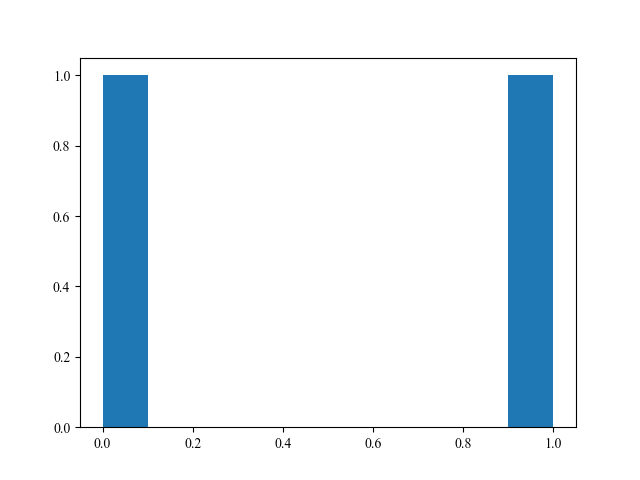

In [53]:
print(f"Number of feasible points: {np.sum(feasibility_data[:, -1])} | infeasible points: {np.sum(feasibility_data[:, -1] == 0)}")
# min and max of each column
print(f"Altitude (col=0) | Min: {np.min(feasibility_data[:, 0]):.2f}, Max: {np.max(feasibility_data[:, 0]):.2f}")
print(f"Vx (col=1) | Min: {np.min(feasibility_data[:, 1]):.2f}, Max: {np.max(feasibility_data[:, 1]):.2f}")
print(f"Vz (col=2) | Min: {np.min(feasibility_data[:, 2]):.2f}, Max: {np.max(feasibility_data[:, 2]):.2f}")
print(f"Mass (col=3) | Min: {np.min(feasibility_data[:, 3]):.2f}, Max: {np.max(feasibility_data[:, 3]):.2f}")
print(f"Tgo (col=4) | Min: {np.min(feasibility_data[:, 4]):.2f}, Max: {np.max(feasibility_data[:, 4]):.2f}")
print(f"Feasibility (col=5) | Min: {np.min(feasibility_data[:, 5]):.2f}, Max: {np.max(feasibility_data[:, 5]):.2f}")
plt.figure()
plt.hist(np.unique(feasibility_data[:, 5]))
plt.show()

In [54]:
from src.reachset import random_sampling_outside_hull
# add infesible points to ctrlable set
data_bounds = (np.min(feasibility_data, axis=0), np.max(feasibility_data, axis=0))
lb = data_bounds[0][:5]
alt, vx, vz, mass, tgo = lb[0], lb[1], lb[2], lb[3], lb[4]
z = np.log(mass)
alt_, vx_, vz_, z_, tgo_ = lrn.transform_ic(alt, vx, vz, z, tgo)
lb_ = np.array([alt_, vx_, vz_, z_, tgo_])

ub = data_bounds[1][:5]
alt, vx, vz, mass, tgo = ub[0], ub[1], ub[2], ub[3], ub[4]
z = np.log(mass)
alt_, vx_, vz_, z_, tgo_ = lrn.transform_ic(alt, vx, vz, z, tgo)
ub_ = np.array([alt_, vx_, vz_, z_, tgo_])

samples = random_sampling_outside_hull(hull_inner.equations, (lb_, ub_), 50000)
infeasible_data = np.hstack((samples, np.zeros((samples.shape[0], 1))))

# combine feasible and infeasible data
feasibility_data = np.vstack((feasibility_data, infeasible_data))

In [19]:
np.save("../saved/controllable_set/reachset_train/20231115-025054/feasibility_data.npy", feasibility_data)

In [20]:
feasibility_data = np.load("../saved/controllable_set/reachset_train/20231115-025054/feasibility_data.npy")

In [55]:
import torch
from torch.utils.data import DataLoader, random_split

In [22]:
feasibility_data = np.load("../saved/controllable_set/reachset_train/20231115-025054/feasibility_data.npy")
print(f"Feasibility data shape: {feasibility_data.shape}")
print(f"Feasibility mean, max, min: {np.mean(feasibility_data[:, 5])}, {np.max(feasibility_data[:, 5])}, {np.min(feasibility_data[:, 5])}")

Feasibility data shape: (138725, 6)
Feasibility mean, max, min: 0.5321607496846279, 1.0, 0.0


In [56]:
# define hyperparameters
train_data_rate = 0.95
batch_size = 512

# create dataset and dataloader
dataset = lrn.ReachsetFeasibility(reachset=feasibility_data)
n_data = len(dataset)
train_size = int(train_data_rate * n_data)
test_size = n_data - train_size
train_set, test_set = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True)

In [57]:
from src.learning import ConvexNN, MLP
import torch.nn as nn

class NeuralReachCvx_Feasibility(ConvexNN):
    def __init__(self, hidden_layers):
        input_dim = 5  # alt, vx, vz, z, tgo
        output_dim = 1  # feasibility score
        super(NeuralReachCvx_Feasibility, self).__init__(
            input_dim,
            output_dim,
            hidden_layers,
        )

    def forward(self, x):
        out = super(NeuralReachCvx_Feasibility, self).forward(x)
        out = torch.sigmoid(-out)
        return out
    


class NeuralReach_Feasibility(MLP):
    def __init__(self, hidden_layers):
        input_dim = 5  # alt, vx, vz, z, tgo
        output_dim = 1  
        activation_fn = nn.ReLU()
        output_activation = nn.Sigmoid()
        dropout_rate = 0.0
        use_double_precision = True
        use_batch_norm = True
        super(NeuralReach_Feasibility, self).__init__(
            input_dim,
            output_dim,
            hidden_layers,
            activation_fn,
            output_activation,
            dropout_rate,
            use_double_precision,
            use_batch_norm,
        )

In [59]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
lr = 1e-4
hidden_layers = [256, 256, 256, 256, 256, 256, 256, 256, 256, 256]

model = NeuralReach_Feasibility(hidden_layers=hidden_layers).double()
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

def custom_loss(y_pred, y_true):
    fp_weight = 1.05  # weight for false positive
    fn_weight = 0.95  # weight for false negative
    loss = fn_weight * y_true * torch.log(y_pred) + fp_weight * (1 - y_true) * torch.log(1 - y_pred)
    return -torch.mean(loss)

loss = custom_loss

In [60]:
num_epochs = 50
print_every = 100
for epoch in range(num_epochs):
    for i, (_, x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        y = y.unsqueeze(1)
        y_hat = model(x)
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        if (i + 1) % print_every == 0:
            print(f"Epoch {epoch + 1}/{num_epochs}, Step {i + 1}/{len(train_loader)}, Loss: {l.item():.4f}")

Epoch 1/50, Step 100/258, Loss: 0.1918
Epoch 1/50, Step 200/258, Loss: 0.2170
Epoch 2/50, Step 100/258, Loss: 0.1333
Epoch 2/50, Step 200/258, Loss: 0.1165
Epoch 3/50, Step 100/258, Loss: 0.1209
Epoch 3/50, Step 200/258, Loss: 0.0864
Epoch 4/50, Step 100/258, Loss: 0.1214
Epoch 4/50, Step 200/258, Loss: 0.1342
Epoch 5/50, Step 100/258, Loss: 0.1276
Epoch 5/50, Step 200/258, Loss: 0.1062
Epoch 6/50, Step 100/258, Loss: 0.1235
Epoch 6/50, Step 200/258, Loss: 0.0942
Epoch 7/50, Step 100/258, Loss: 0.0847
Epoch 7/50, Step 200/258, Loss: 0.1026


KeyboardInterrupt: 

In [41]:
import datetime
now = datetime.datetime.now()
now = now.strftime("%Y%m%d-%H%M%S")
out_dir = f"../saved/controllable_set/reachset_train/models_{now}"
os.makedirs(out_dir)
torch.save(model.state_dict(), f"{out_dir}/feas.pth")

In [61]:
from src.reachset import random_sampling_in_hull, inside_hull
# random samples form feasibility_data; use random choice
n_samples = 10
indices = np.random.choice(feasibility_data.shape[0], n_samples, replace=False)
feasible_samples = feasibility_data[indices, :]

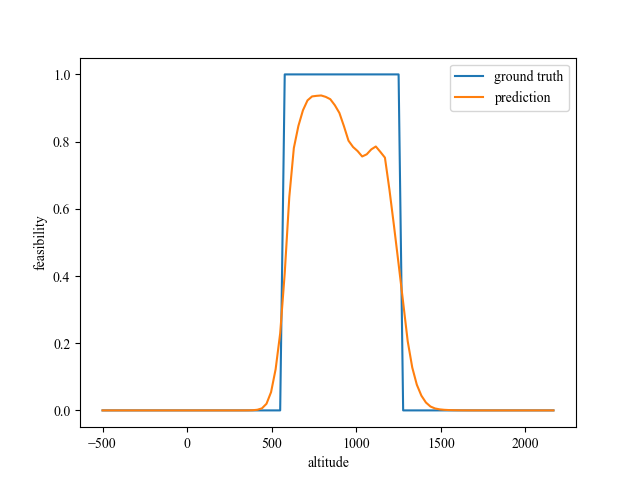

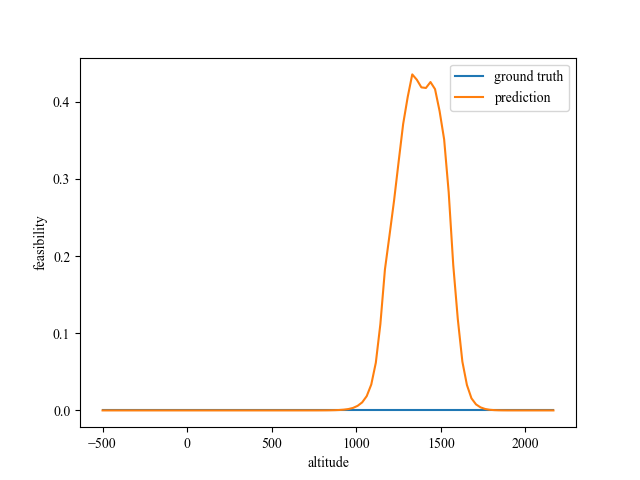

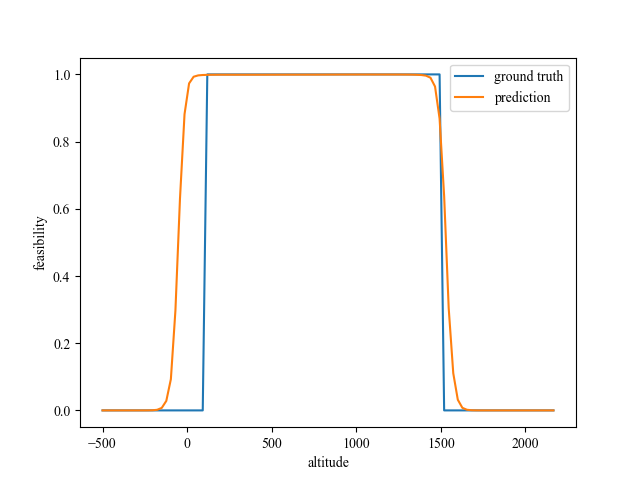

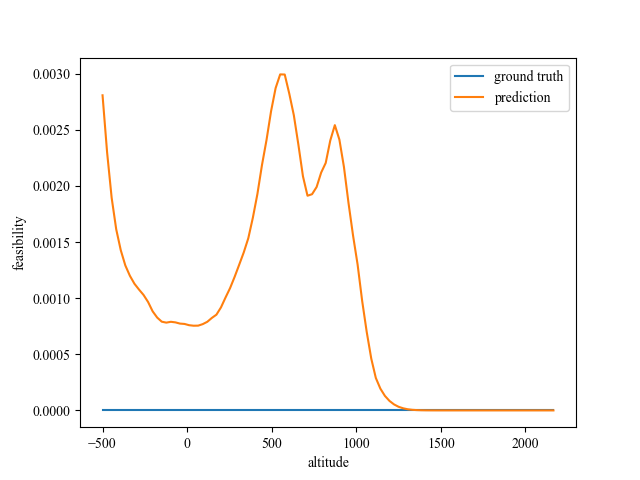

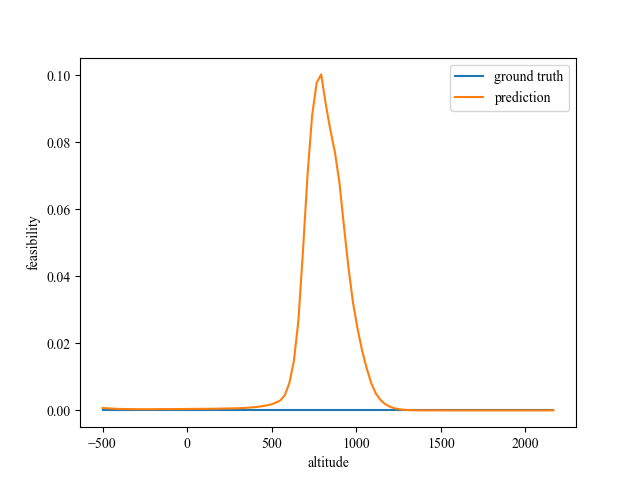

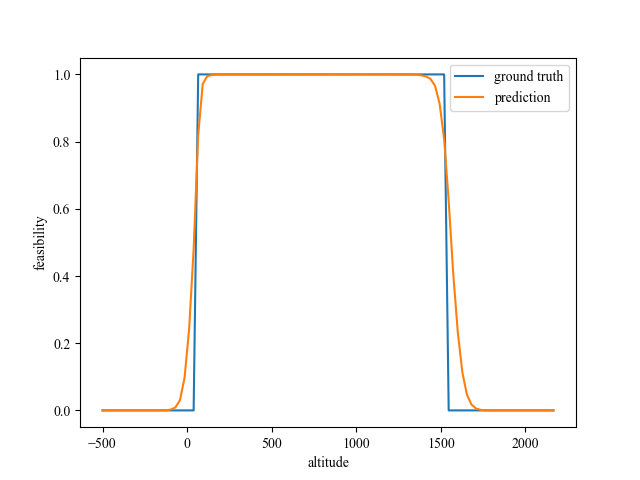

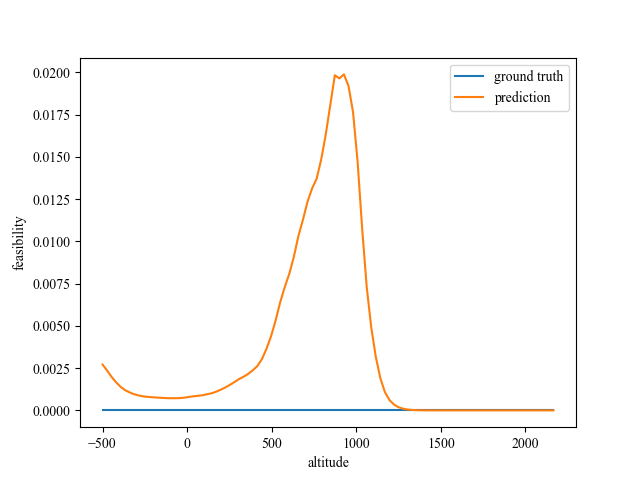

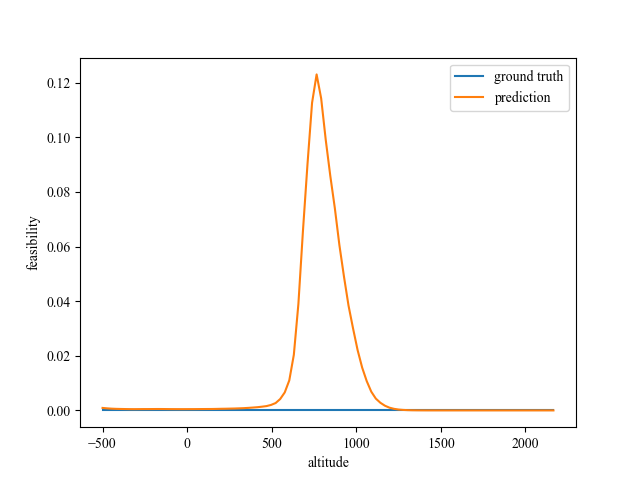

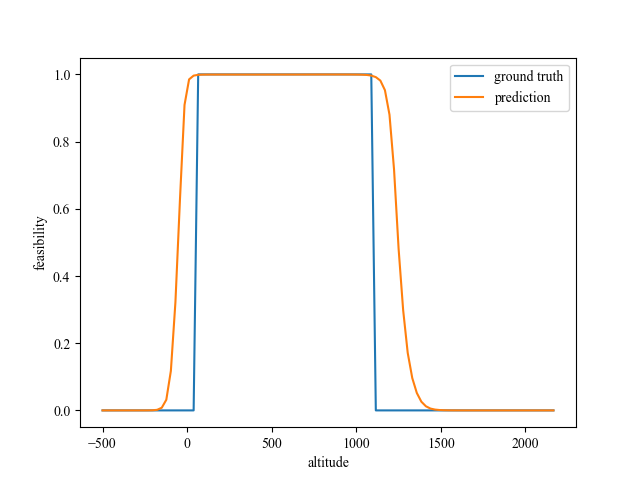

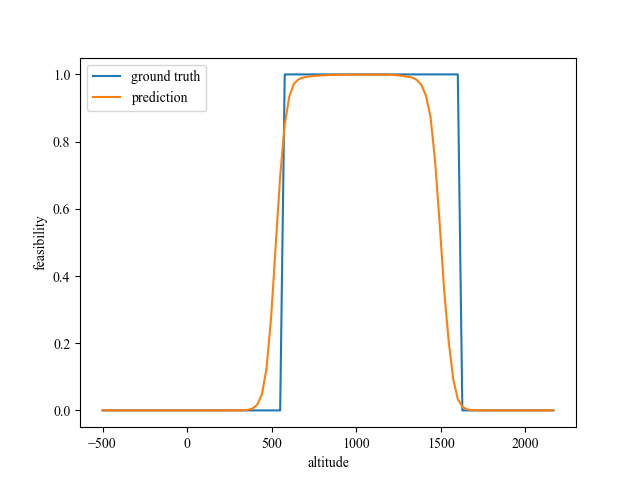

In [62]:
model.eval()
n = 100
for feasible_sample in feasible_samples:
    # denormalize
    alt, vx, vz, mass, tgo = feasible_sample[:5]
    z = np.log(mass)

    alt_min = np.min(feasibility_data[:, 0]) - 500
    alt_max = np.max(feasibility_data[:, 0]) + 500
    y_list = []
    y_hat_list = []
    alt_list = []
    for i in range(n):
        alt = alt_min + (alt_max - alt_min) * i / n
        alt_, vx_, vz_, z_, tgo_ = lrn.transform_ic(alt, vx, vz, z, tgo)
        x = torch.tensor([alt_, vx_, vz_, z_, tgo_]).unsqueeze(0).to(device)
        y_hat = model(x)
        
        data_point = np.array([alt, vx, vz, mass, tgo])
        point_ = np.array([alt_, vx_, vz_, z_, tgo_]).T
        #y = find_min_distance_to_convex_hull(point_, hull_inner)

        y = inside_hull(point_, hull_inner.equations)

        y_list.append(y)
        y_hat_list.append(y_hat.item())
        alt_list.append(alt)

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ax.plot(alt_list, y_list, label='ground truth')
    ax.plot(alt_list, y_hat_list, label='prediction')
    ax.set_xlabel('altitude')
    ax.set_ylabel('feasibility')
    ax.legend()
    plt.show()



